# Прогнозирование цель на автомобили 

## EDA (Exploratory data analysis)

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
warnings.filterwarnings('ignore')

In [2]:
#Список используемых функций 
def numerical_visualization(df):
    '''
    input: датафрейм
    output: график с гистограммами для всхе числовых данных 
    '''
    numerical_lst=df.select_dtypes(include=np.number).columns.tolist()
    num_cols=5
    num_rows= math.ceil(len(numerical_lst)/5)
    plt.figure(figsize=(12, 8))
    for feature in numerical_lst:
        plt.subplot(num_rows, num_cols, numerical_lst.index(feature) + 1)
        sns.histplot(data=df[feature], bins=20, kde=True)
        plt.title(feature)
    plt.tight_layout()
    plt.show()
    

def search_categorial_vars(df):
    '''
    input: датафрейм
    output: список всех категориальных переменных
    '''
    numerical_lst=df.select_dtypes(include=np.number).columns.tolist()
    categorical_columns=df.drop(numerical_lst, axis=1).columns.tolist()
    return categorical_columns
    
def categorial_visualization(df):
    '''
    input: датафрейм
    output: график с барплотами представленности классов во всех категориальных признаках
    '''
    categorical_columns=search_categorial_vars(df)
    cols_num= 3
    rows_num= math.ceil(len(categorical_columns)/cols_num)
    
    fig, axes = plt.subplots(nrows=rows_num, ncols=cols_num, figsize=(13, 10))
    axes = axes.ravel() 
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=df[column], data=df, palette='pastel', ax=axes[i], saturation=0.95)
        for container in axes[i].containers:
            axes[i].bar_label(container, color='black', size=10)
        axes[i].tick_params("x", rotation=45)
        axes[i].set_title(f'Представленность классов в {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('Кол-во')

    plt.tight_layout()
    plt.show()
    
def all_categorial_for_one_numeric(df, numeric_col):
    '''
    input: датафрейм - df, названий колонки с численными значениями 
    output: график с боксплотами по числовой колонке для всех категориальных признаков 
    '''
    categorical_columns=search_categorial_vars(df)
    plt.figure(figsize=(12, 8))
    cols_num=3
    rows_num= math.ceil(len(categorical_columns)/cols_num)
    for feature in categorical_columns:
        plt.subplot(rows_num, cols_num, categorical_columns.index(feature) + 1)
        sns.boxplot(data=df, x=feature, y=numeric_col,palette='pastel')
        plt.title(f'{feature} vs. {numeric_col}')
        plt.tick_params("x", rotation=45)
    plt.tight_layout()
    plt.show()
    
def correlation_matrix(df):
    '''
    input: датафрейм 
    output:OUT: матрица корреляций
    '''
    numerical_lst=df.select_dtypes(include=np.number).columns.tolist()
    correlation_matrix = df[numerical_lst].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

In [3]:
df = pd.read_csv('./car_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#размер датасета 
df.shape

(205, 26)

In [5]:
#тип данных в колонках
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
#сколько null'ов в датасете
sum(df.isnull().sum(axis=0))

0

In [7]:
#дубликаты наблюдений
df.duplicated().sum()

np.int64(0)

In [8]:
#число уникальных значений в каждом столбце
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [9]:
#сборная статистика 
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


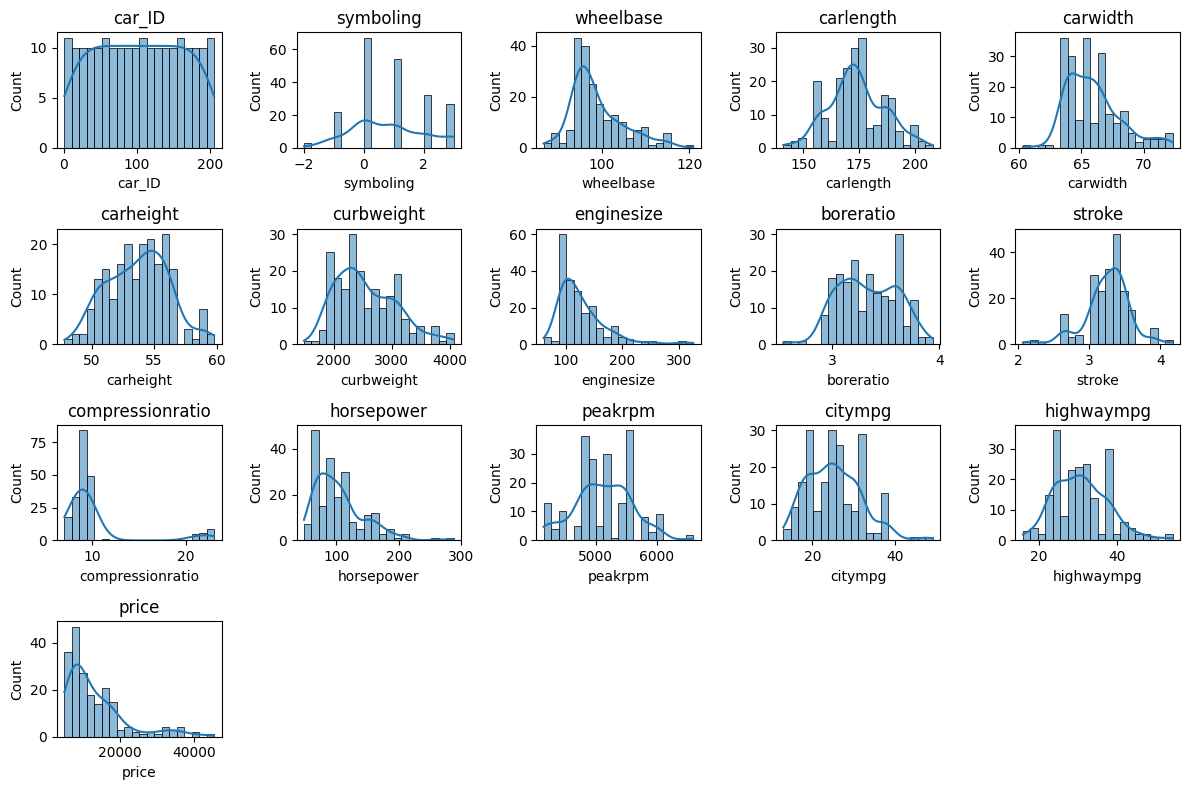

In [10]:
#визуализация числовых данных
numerical_visualization(df)

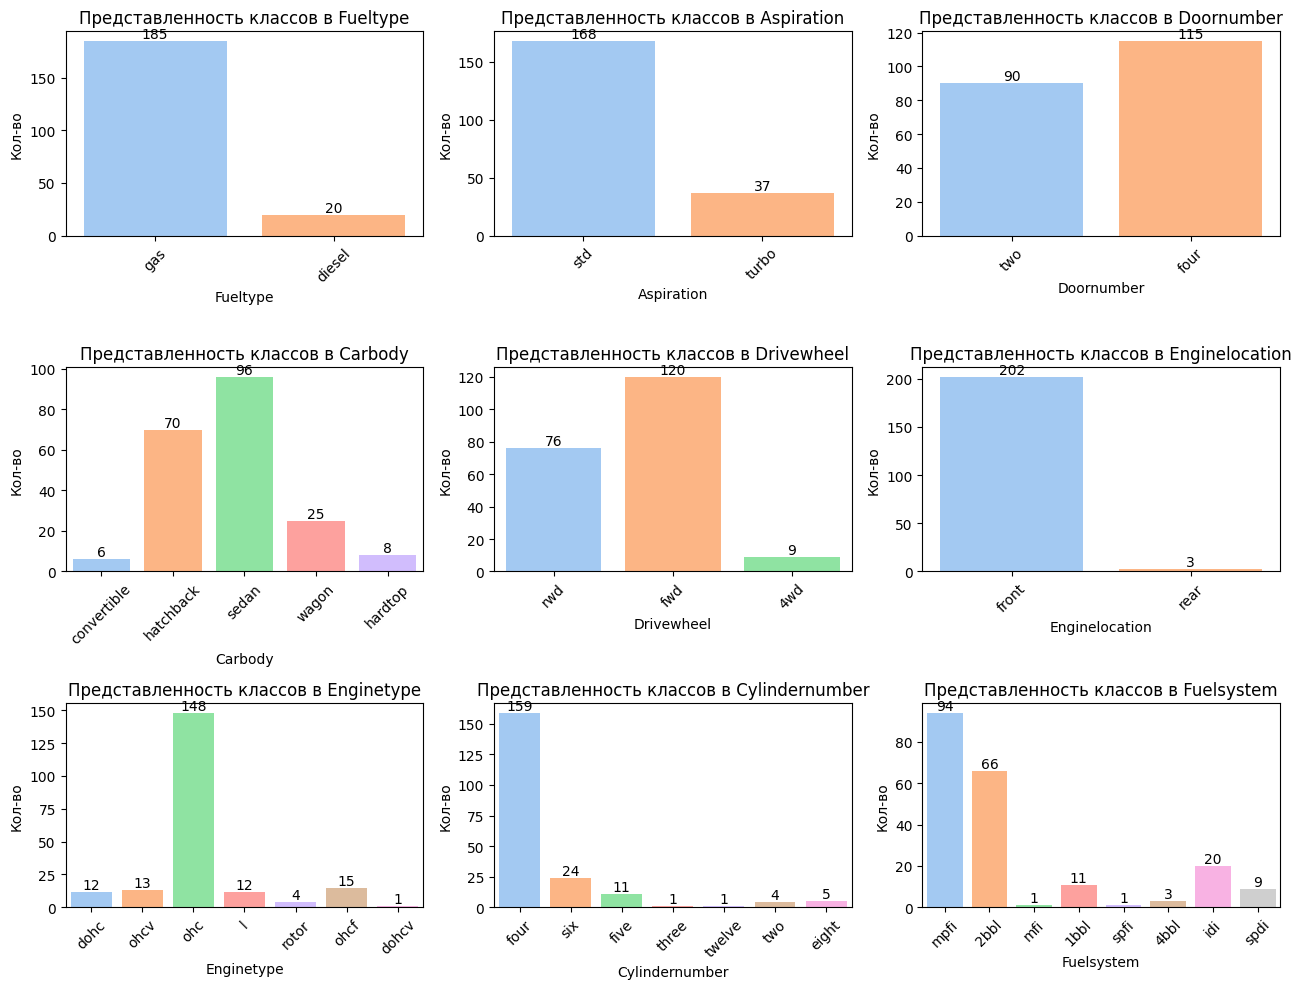

In [11]:
#визуализация категориальных данных
categorial_visualization(df.drop("CarName",axis=1))

При визуализации категориальных данных был исключен из рассмотрения столбец CarName, так как названий автомобилей очень много. Поэтому отдельно рассмотрим топ-20 самых распространенных автомобилей

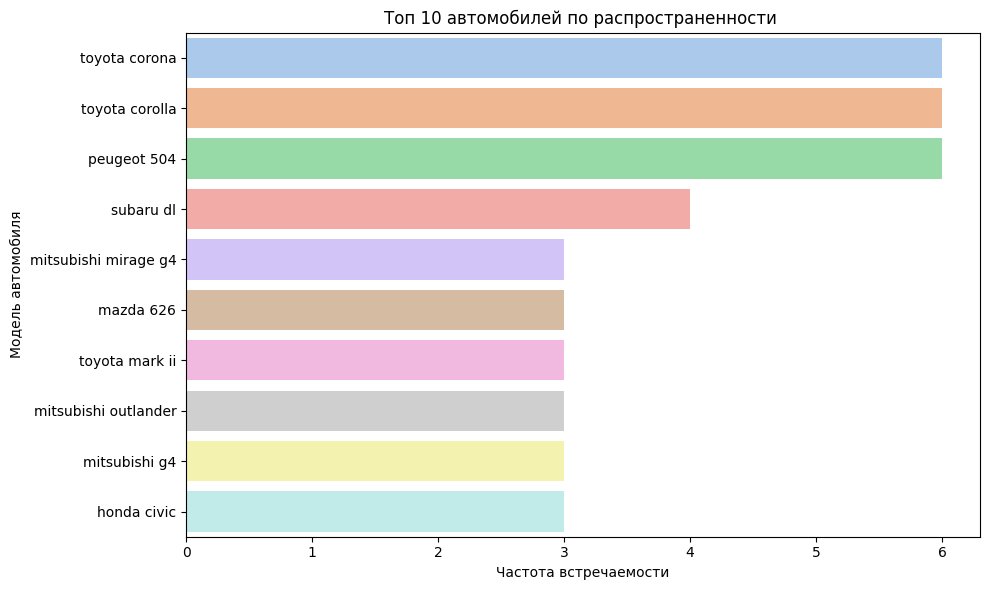

In [12]:
n = 10
top_car_models = df['CarName'].value_counts().head(n)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette="pastel")
plt.title(f'Топ {n} автомобилей по распространенности ')
plt.xlabel('Частота встречаемости')
plt.ylabel('Модель автомобиля')
plt.tight_layout()
plt.show()

Посмотрим на модели автомобилей с самыми высокими медианными ценами

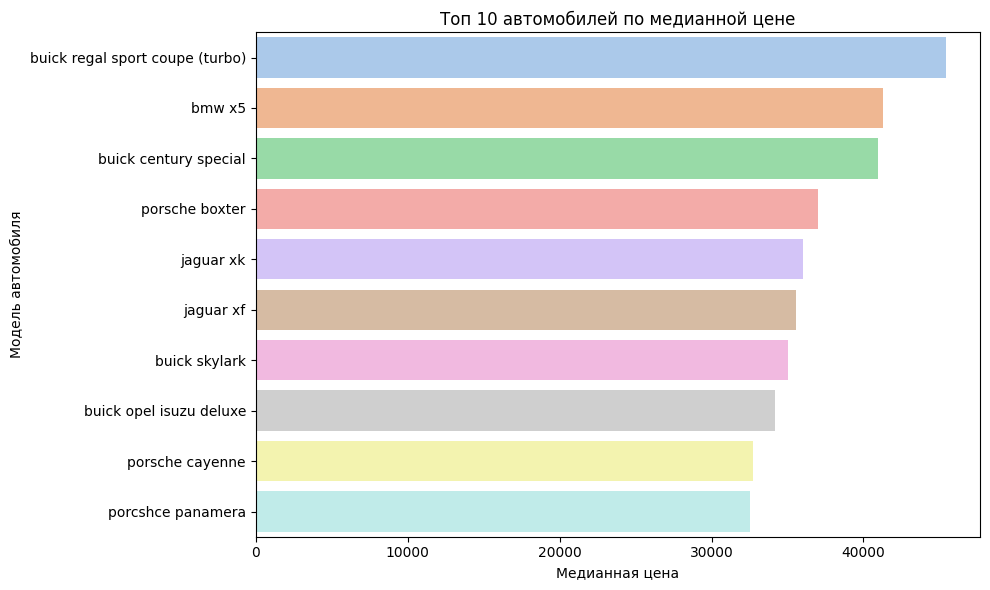

In [13]:
avg_prices_by_car = df.groupby('CarName')['price'].median().sort_values(ascending=False) 
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette="pastel")
plt.title(f'Топ {n} автомобилей по медианной цене')
plt.xlabel('Медианная цена')
plt.ylabel('Модель автомобиля')
plt.tight_layout()
plt.show()

Посмотрим на распределение цен в зависимости от разных категориальных переменных

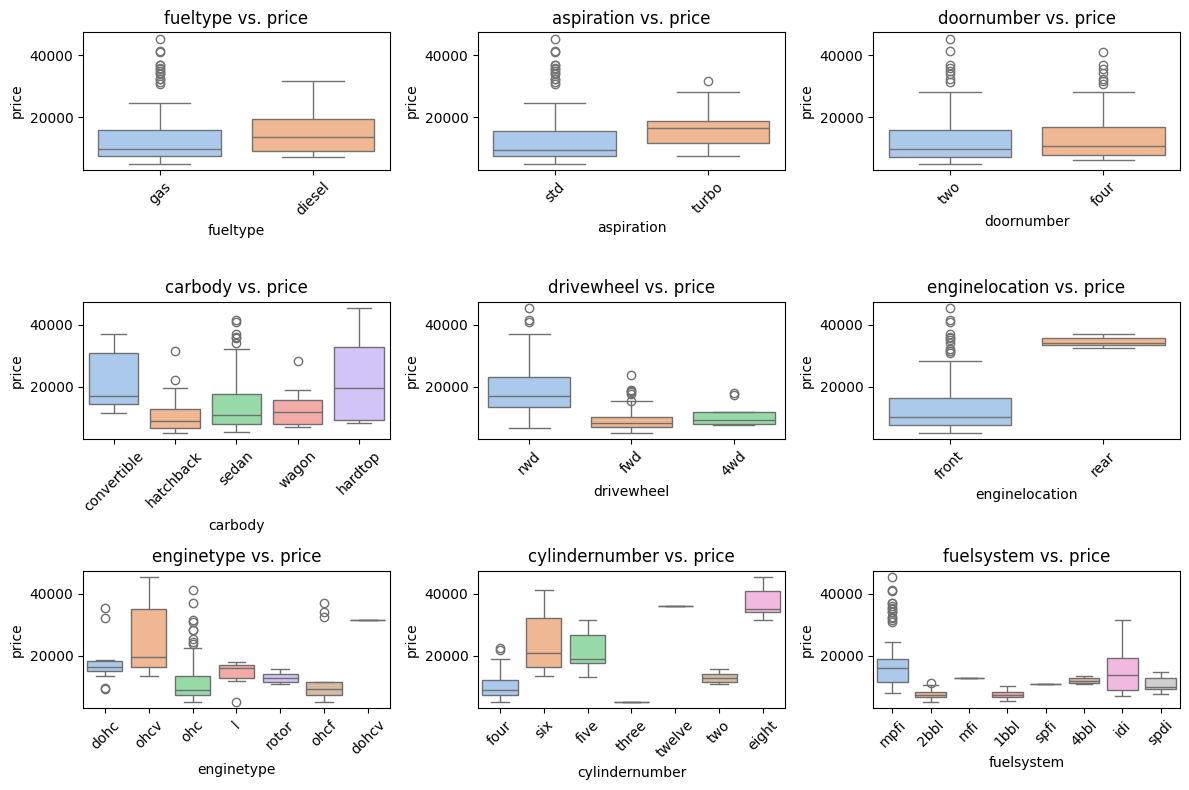

In [14]:
#цены 
all_categorial_for_one_numeric(df.drop('CarName',axis=1),"price")

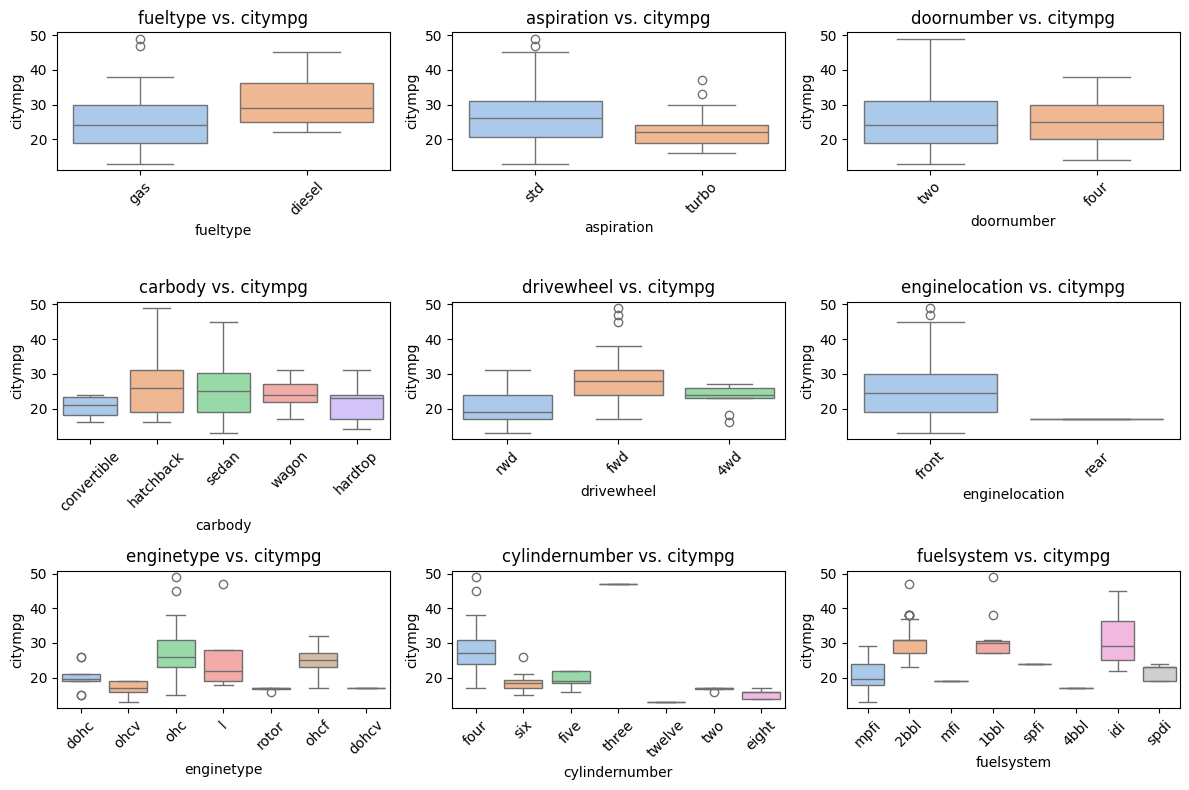

In [15]:
# mpg, расход топлива
all_categorial_for_one_numeric(df.drop('CarName',axis=1),"citympg")

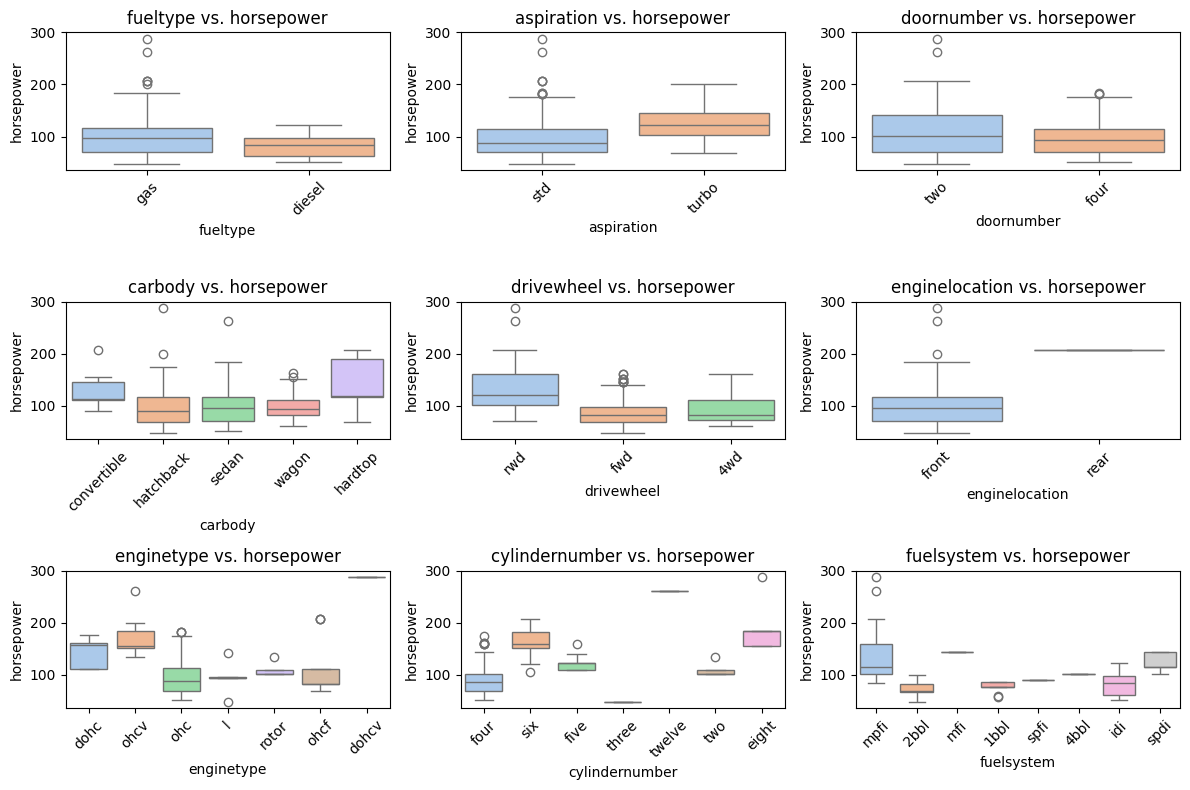

In [16]:
# лошадиные силы 
all_categorial_for_one_numeric(df.drop('CarName',axis=1),"horsepower")

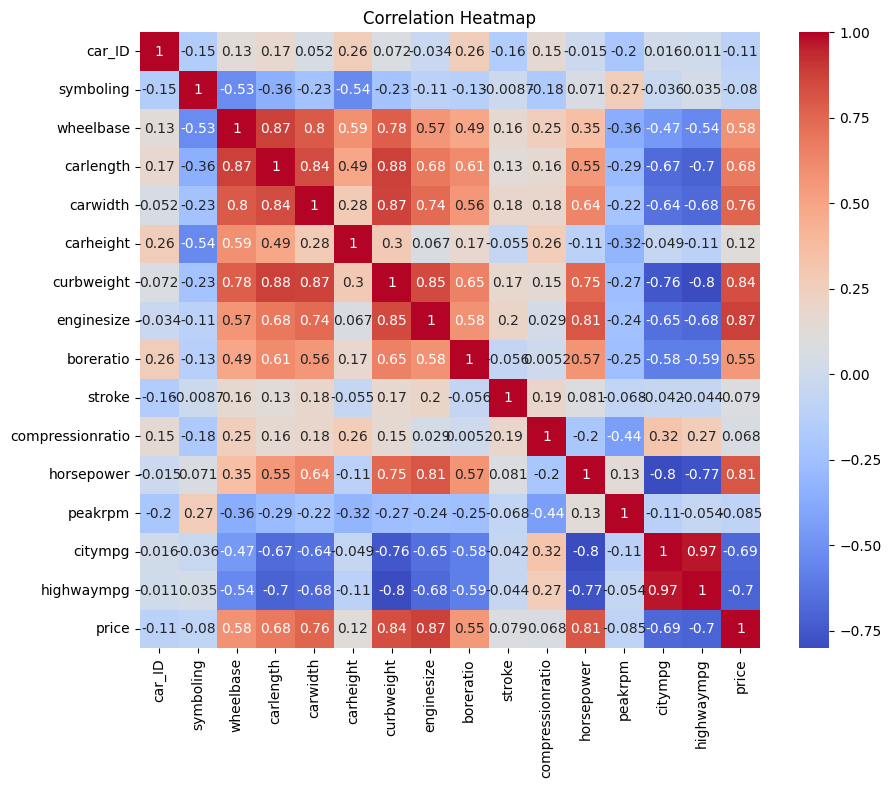

In [17]:
correlation_matrix(df)

## Информация из статистики

### Разнообразие автомобилей 
- Датасет содержит данные о 205 моделях автомобилей, каждая из которых имеет уникальные характеристики.
- Размеры, вес и объем двигателей существенно различаются.

### Диапазон цен 
- **Минимальная цена**: 5 118 долларов.
- **Максимальная цена**: 45 400 долларов.
- **Средняя цена автомобиля**: около 13 276 долларов.

### Разнообразие двигателей 🛠
- Двигатели отличаются диаметром цилиндра (boreratio) и длиной хода поршня (stroke).
- Рейтинги риска (symboling) варьируются от -2 до 3.

### Распределение данных 
- Характеристики, такие как ширина автомобиля (carwidth), вес (curbweight) и объем двигателя (enginesize), показывают значительную вариативность.
- Возможны выбросы в данных по степени сжатия (compressionratio) и мощности двигателя (horsepower).

---

## Результаты анализа 📊🔍

### Основная информация:
- Датасет о ценах автомобилей содержит **205 строк и 26 столбцов**.
- **Нет пропущенных значений** .
- **Дублированных данных нет** .

### Цены на автомобили 💰💥
- **Средняя цена**: 13 276 долларов .
- **Минимальная цена**: 5 118 долларов .
- **Максимальная цена**: 45 400 долларов .

### Популярные марки
- Самый популярный автомобиль в данных — **Toyota** .

### Тип топлива
- Около **90% автомобилей работают на бензине**, при этом их средняя цена ниже, чем у автомобилей на дизеле. 
- Автомобили на дизеле составляют около **10%**, но их средняя цена выше. 

### Наличие турбонаддува
- Около **82% автомобилей без турбонаддува**, и их средняя цена ниже. Турбонаддув имеют около **18% автомобилей**. 

### Количество дверей
- Примерно **56% автомобилей имеют 4 двери**, а **46% — 2 двери**. Средняя цена спорткаров остается примерно на том же уровне. 

### Типы автомобилей
- Наиболее предпочтительный тип автомобиля — **седан**, но популярны также более дорогие типы, такие как кабриолеты и автомобили с жесткой крышей. 

### Привод
- Большинство пользователей выбирают автомобили с **передним приводом (fwd)**, что связано с их более низкой ценой.

### Тип двигателя
- Самый распространенный тип двигателя — **"ohc"**, и он связан с более низкой стоимостью.

### Количество цилиндров
- При увеличении количества цилиндров стоимость автомобиля увеличивается, однако большинство автомобилей имеют **4 цилиндра**.

### Размер двигателя
- Увеличение объема двигателя приводит к росту цены.

### Габариты автомобиля
- База колес (wheelbase), длина (car length) и ширина автомобиля (car width) влияют на цену, тогда как высота (car height) значительного влияния не оказывает.


## Препроцессинг 

In [18]:
# разделим названия автомобилей на бренд и модель
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [19]:
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

#приводим категориальные переменные к числовому виду
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# стандартизуем
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [20]:
#Будем здесь хранить R-squared разных моделей
results={}

## Линейная регрессия 

In [21]:
X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
results["Linear_model"]=r2_square
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8615670883334448
Mean Squared Error: 10928450.669036347


In [23]:
model = linear_model.Lasso(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
results["Linear_model (L1)"]=r2_square
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8725502619115011
Mean Squared Error: 10061394.784765363


## Случайное дерево

Выберем лучшие параметры 

In [25]:
param_grid = {
    "n_estimators": [20, 50, 100],
    "max_depth": [7, 12, 15, 20],
    "min_samples_split": [2, 5, 10],
    "criterion": ["squared_error"],
    "random_state": [42],}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error", 
    cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

{'criterion': 'squared_error',
 'max_depth': 12,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [26]:
y_pred = best_model.predict(X_test)

In [27]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
results["Random Forest"]=rf_r2
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

Random Forest MSE: 3545762.24
Random Forest R²: 0.96


## Градиентный бустинг 

In [28]:
param_grid_gb = {
    "n_estimators": [20 , 50, 100],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "random_state": [42],
}
gb_model = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    scoring="neg_mean_squared_error",
    cv=5)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_
best_params_gb

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 42}

In [29]:
y_pred = best_model_gb.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)
results["Gradient Boosting"]=r2_gb
print(f"Random Forest MSE: {rmse_gb:.2f}")
print(f"Random Forest R²: {r2_gb:.2f}")

Random Forest MSE: 4088468.64
Random Forest R²: 0.95


## Выводы 

Text(0, 0.5, 'R-squared')

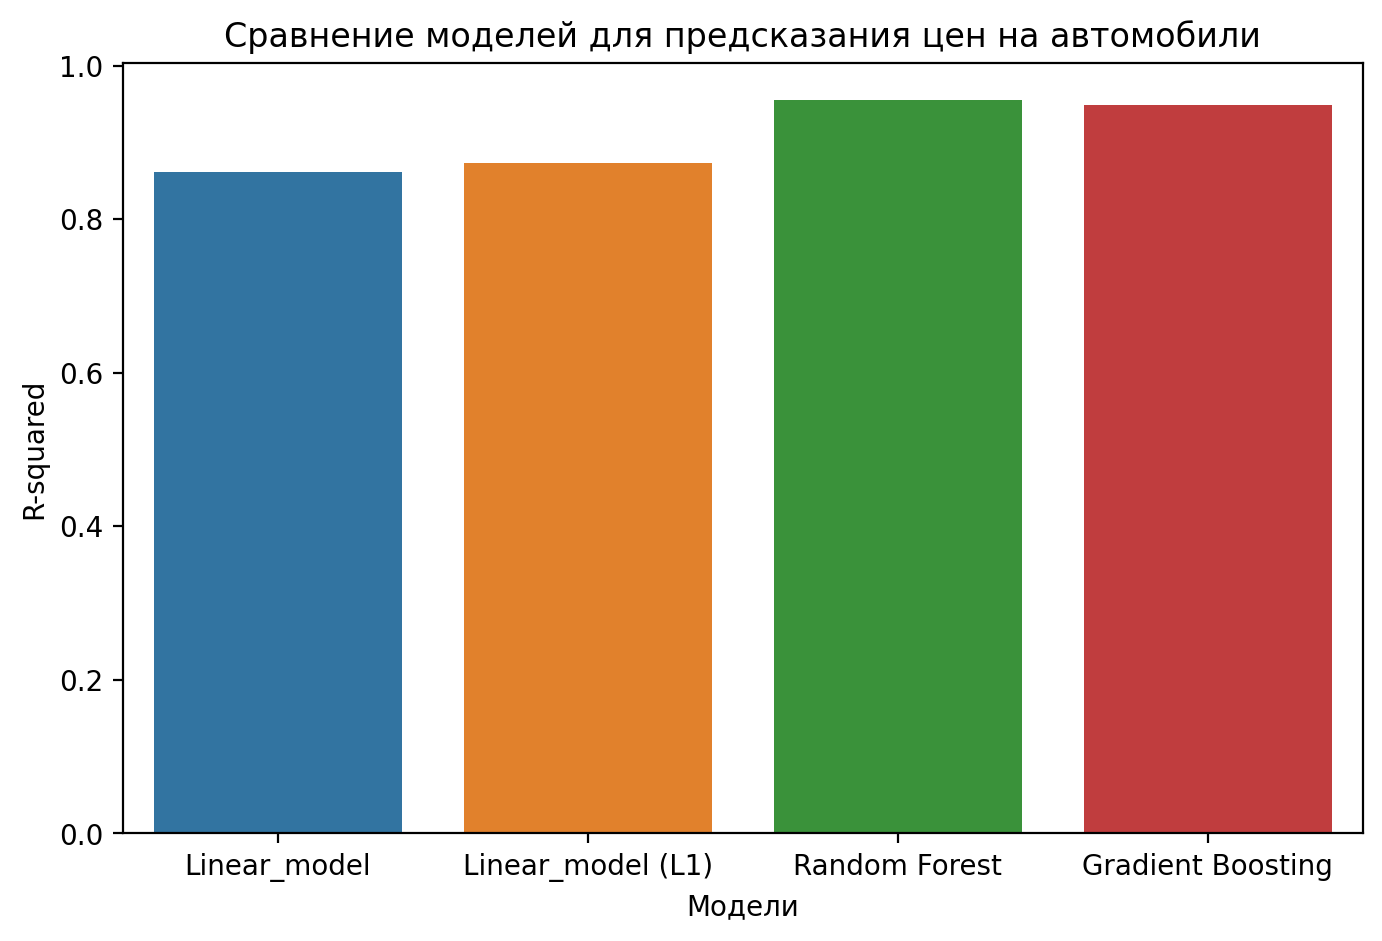

In [30]:
plt.figure(figsize=(8, 5),dpi=200)
sns.barplot(pd.DataFrame([results]))
plt.title("Сравнение моделей для предсказания цен на автомобили")
plt.xlabel("Модели")
plt.ylabel("R-squared")